In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

In [2]:
# grab data from csv
csvpath = "../data/Analytics_Sample_Data_rsc.csv"

df = pd.read_csv(csvpath)
print(len(df.index))
df = df.dropna()
print(len(df.index))
df = df.reset_index(drop=True)

df.head()

18078
13524


,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0


In [3]:
# Since datetimes are strings (in DD HH:MM:SS format) and there is a 31st order date,
# I will arbitrarily assign "January" to all the order placed times for datetime calculations

# Split the data between dates and times
df_times = df['Customer_placed_order_datetime'].str.split(" ", n = 1, expand = True)
df_times.columns = ["Order Placed Date", "Order Placed Time"]
df_times[['Restaurant Order Placed Date', 'Restaurant Order Placed Time']] = df['Placed_order_with_restaurant_datetime'].str.split(" ", n=1, expand = True)
df_times[['Driver at Restaurant Date', 'Driver at Restaurant Time']] = df['Driver_at_restaurant_datetime'].str.split(" ", n=1, expand = True)
df_times[['Delivered Date', 'Delivered Time']] = df['Delivered_to_consumer_datetime'].str.split(" ", n=1, expand = True)

df_times.head()

,Order Placed Date,Order Placed Time,Restaurant Order Placed Date,Restaurant Order Placed Time,Driver at Restaurant Date,Driver at Restaurant Time,Delivered Date,Delivered Time
0,14,20:27:45,14,20:29:41,14,20:39:32,14,20:52:03
1,07,20:16:28,07,20:17:32,07,20:36:00,07,20:49:02
2,13,19:35:09,13,19:39:26,13,20:28:16,13,20:52:44
3,22,19:47:53,22,19:56:08,22,20:01:20,22,20:18:01
4,03,19:01:52,03,19:09:08,03,19:36:20,03,19:45:26


In [4]:
# See if there are deliveries from one month to the next by comparing dates
# Label with month "01" or "02" accordingly
df_times['Order Placed Month'] = '01'

df_times = df_times.astype({"Order Placed Date":"int", "Restaurant Order Placed Date":"int", "Driver at Restaurant Date":"int", "Delivered Date":"int"})
df_times['Restaurant Order Placed Month'] = df_times.apply(lambda x: '02' if x['Restaurant Order Placed Date'] <
                     x['Order Placed Date'] else '01', axis=1)
# df_times['Restaurant Order Placed Month'].unique()
df_times.loc[df_times['Restaurant Order Placed Month'] == '02'].head(15)

,Order Placed Date,Order Placed Time,Restaurant Order Placed Date,Restaurant Order Placed Time,Driver at Restaurant Date,Driver at Restaurant Time,Delivered Date,Delivered Time,Order Placed Month,Restaurant Order Placed Month
452,31,22:46:48,1,00:03:54,1,00:24:35,1,00:47:03,01,02
837,31,17:55:31,1,17:45:48,1,18:16:04,1,18:55:53,01,02
922,31,22:36:42,1,00:14:09,1,00:46:01,1,01:00:53,01,02
2231,31,02:56:34,1,00:03:56,1,00:31:57,1,00:41:30,01,02
2284,31,23:59:56,1,18:12:54,1,18:15:03,1,18:42:18,01,02
3427,31,21:47:28,1,17:19:14,1,18:26:18,1,19:19:58,01,02
4239,31,21:14:44,1,18:03:05,1,18:20:27,1,18:50:51,01,02
4507,31,21:48:42,1,03:54:38,1,18:17:24,1,19:13:51,01,02
6290,31,23:58:34,1,00:00:51,1,00:10:59,1,00:46:20,01,02
7128,31,23:59:46,1,00:39:04,1,01:08:03,1,01:49:07,01,02


In [5]:
# Found a weird datapoint that was ordered ASAP and delivered on the same day,
# but for some reason the order was placed with restaurant the next day.
df.iloc[[9679]]

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
9679,30 19:27:08,01 00:23:32,30 20:23:42,30 20:53:12,426,408,59745,False,Mountain View,True,17.85,0.0,0.89,0.0


In [6]:
# I delete the row as a data entry error here, but would probably have checked with others in a real situation
df = df.drop(9679, axis=0)
df = df.reset_index(drop=True)

df_times = df_times.drop(9679, axis=0)
df_times = df_times.reset_index(drop=True)


In [7]:
# Continue seeing if delivery time spans into the next month, and indicate any month changes accordingly
df_times['Driver at Restaurant Month'] = df_times.apply(lambda x: '02' if x['Driver at Restaurant Date'] <
                     x['Order Placed Date'] else '01', axis=1)
df_times['Delivered Month'] = df_times.apply(lambda x: '02' if x['Delivered Date'] <
                     x['Order Placed Date'] else '01', axis=1)
df_times.head()
# no other odd data entry problems detected

,Order Placed Date,Order Placed Time,Restaurant Order Placed Date,Restaurant Order Placed Time,Driver at Restaurant Date,Driver at Restaurant Time,Delivered Date,Delivered Time,Order Placed Month,Restaurant Order Placed Month,Driver at Restaurant Month,Delivered Month
0,14,20:27:45,14,20:29:41,14,20:39:32,14,20:52:03,01,01,01,01
1,7,20:16:28,7,20:17:32,7,20:36:00,7,20:49:02,01,01,01,01
2,13,19:35:09,13,19:39:26,13,20:28:16,13,20:52:44,01,01,01,01
3,22,19:47:53,22,19:56:08,22,20:01:20,22,20:18:01,01,01,01,01
4,3,19:01:52,3,19:09:08,3,19:36:20,3,19:45:26,01,01,01,01


In [8]:
# Create datetimes for each order
df_times = df_times.astype({"Order Placed Date":"str", "Restaurant Order Placed Date":"str", "Driver at Restaurant Date":"str", "Delivered Date":"str"})
df['Order Placed Datetime'] = "2018-" + df_times["Order Placed Month"] + "-" + df_times["Order Placed Date"] + " " + df_times["Order Placed Time"]
df['Restaurant Order Placed Datetime'] = "2018-" + df_times["Restaurant Order Placed Month"] + "-" + df_times["Restaurant Order Placed Date"] + " " + df_times["Restaurant Order Placed Time"]
df['Driver at Restaurant Datetime'] = "2018-" + df_times["Driver at Restaurant Month"] + "-" + df_times["Driver at Restaurant Date"] + " " + df_times["Driver at Restaurant Time"]
df['Delivered Datetime'] = "2018-" + df_times["Delivered Month"] + "-" + df_times["Delivered Date"] + " " + df_times["Delivered Time"]

df['Order Placed Datetime'] = pd.to_datetime(df['Order Placed Datetime'], format='%Y-%m-%d %H:%M:%S')
df['Restaurant Order Placed Datetime'] = pd.to_datetime(df['Restaurant Order Placed Datetime'], format='%Y-%m-%d %H:%M:%S')
df['Driver at Restaurant Datetime'] = pd.to_datetime(df['Driver at Restaurant Datetime'], format='%Y-%m-%d %H:%M:%S')
df['Delivered Datetime'] = pd.to_datetime(df['Delivered Datetime'], format='%Y-%m-%d %H:%M:%S')
df.head()


,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount,Order Placed Datetime,Restaurant Order Placed Datetime,Driver at Restaurant Datetime,Delivered Datetime
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,2018-01-14 20:27:45,2018-01-14 20:29:41,2018-01-14 20:39:32,2018-01-14 20:52:03
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,2018-01-07 20:16:28,2018-01-07 20:17:32,2018-01-07 20:36:00,2018-01-07 20:49:02
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,2018-01-13 19:35:09,2018-01-13 19:39:26,2018-01-13 20:28:16,2018-01-13 20:52:44
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0,2018-01-22 19:47:53,2018-01-22 19:56:08,2018-01-22 20:01:20,2018-01-22 20:18:01
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0,2018-01-03 19:01:52,2018-01-03 19:09:08,2018-01-03 19:36:20,2018-01-03 19:45:26


In [9]:
# order times seem odd, so seeing if converting to PST (where the restaurants are located) from UTC makes them reasonable
df['Order Placed Datetime'] = df['Order Placed Datetime'].dt.tz_localize('GMT').dt.tz_convert('US/Pacific')
df['Restaurant Order Placed Datetime'] = df['Restaurant Order Placed Datetime'].dt.tz_localize('GMT').dt.tz_convert('US/Pacific')
df['Driver at Restaurant Datetime'] = df['Driver at Restaurant Datetime'].dt.tz_localize('GMT').dt.tz_convert('US/Pacific')
df['Delivered Datetime'] = df['Delivered Datetime'].dt.tz_localize('GMT').dt.tz_convert('US/Pacific')

df.head()

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount,Order Placed Datetime,Restaurant Order Placed Datetime,Driver at Restaurant Datetime,Delivered Datetime
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,2018-01-14 12:27:45-08:00,2018-01-14 12:29:41-08:00,2018-01-14 12:39:32-08:00,2018-01-14 12:52:03-08:00
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,2018-01-07 12:16:28-08:00,2018-01-07 12:17:32-08:00,2018-01-07 12:36:00-08:00,2018-01-07 12:49:02-08:00
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,2018-01-13 11:35:09-08:00,2018-01-13 11:39:26-08:00,2018-01-13 12:28:16-08:00,2018-01-13 12:52:44-08:00
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0,2018-01-22 11:47:53-08:00,2018-01-22 11:56:08-08:00,2018-01-22 12:01:20-08:00,2018-01-22 12:18:01-08:00
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0,2018-01-03 11:01:52-08:00,2018-01-03 11:09:08-08:00,2018-01-03 11:36:20-08:00,2018-01-03 11:45:26-08:00


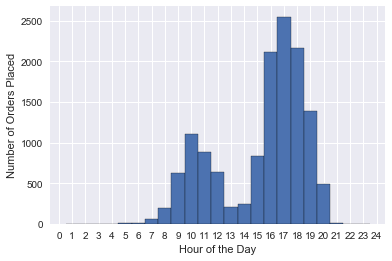

In [10]:
# plt.bar(x_axis, bars_in_cities, color="blue", align="center")
fig, ax = plt.subplots()
plottimes = df["Order Placed Datetime"].dt.hour
plt.hist(plottimes, bins=np.arange(0,24)+0.5, ec="k")
plt.locator_params(axis='y', integer=True)
ax.set_xticks(np.arange(0,25))

plt.ylabel("Number of Orders Placed")
plt.xlabel("Hour of the Day")
plt.savefig("../artifacts/DeliveryHourHist.png")
plt.show()

In [11]:
# plt.bar(x_axis, bars_in_cities, color="blue", align="center")
plottimes = df["Order Placed Datetime"].dt.hour
plottimes.head()

0    12
1    12
2    11
3    11
4    11
Name: Order Placed Datetime, dtype: int64

In [13]:
# time to get food to customer (Delivered time - Order time)
df['Total Delivery Time'] = (df['Delivered Datetime'] - df['Order Placed Datetime']) / pd.Timedelta(minutes=1)

fig, ax = plt.subplots()
plottimes = df["Order Placed Datetime"].dt.hour
plt.hist(plottimes, bins=np.arange(0,24)+0.5, ec="k")
plt.locator_params(axis='y', integer=True)
ax.set_xticks(np.arange(0,25))

plt.ylabel("Number of Orders")
plt.xlabel("Time to Deliver (min)")
#plt.savefig("../artifacts/deliverduration.png")
plt.show()

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount,Order Placed Datetime,Restaurant Order Placed Datetime,Driver at Restaurant Datetime,Delivered Datetime,Total Delivery Time
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,2018-01-14 12:27:45-08:00,2018-01-14 12:29:41-08:00,2018-01-14 12:39:32-08:00,2018-01-14 12:52:03-08:00,24.300000
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,2018-01-07 12:16:28-08:00,2018-01-07 12:17:32-08:00,2018-01-07 12:36:00-08:00,2018-01-07 12:49:02-08:00,32.566667
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,2018-01-13 11:35:09-08:00,2018-01-13 11:39:26-08:00,2018-01-13 12:28:16-08:00,2018-01-13 12:52:44-08:00,77.583333
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0,2018-01-22 11:47:53-08:00,2018-01-22 11:56:08-08:00,2018-01-22 12:01:20-08:00,2018-01-22 12:18:01-08:00,30.133333
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0,2018-01-03 11:01:52-08:00,2018-01-03 11:09:08-08:00,2018-01-03 11:36:20-08:00,2018-01-03 11:45:26-08:00,43.566667
